## Historical meteorogy data of Phenoix park station, Dublin, Ireland
This dataset is taken from -
https://www.met.ie/climate/available-data/historical-data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as date
import math
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('../data/meterology/hly175.csv')

## Data processing
**Data columns description**
* date:  -  Date and Time (utc)
* rain:  -  Precipitation Amount (mm)
* temp:  -  Air Temperature (C)
* wetb:  -  Wet Bulb Temperature (C)
* dewpt: -  Dew Point Temperature (C)
* vappr: -  Vapour Pressure (hPa)
* rhum:  -  Relative Humidity (%) 
* msl:   -  Mean Sea Level Pressure (hPa)
* ind:   -  Indicator

**The dataset consists of hourly readings from year 2003-2022**

In [3]:
raw_data.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
0,16/08/03 1:00,0,0,0,9.2,0,8.9,8.5,11.1,95,1021.9
1,16/08/03 2:00,0,0,0,9,0,8.7,8.5,11.1,96,1021.7
2,16/08/03 3:00,0,0,0,8.2,0,8,7.7,10.5,96,1021.2
3,16/08/03 4:00,0,0,0,8.4,0,8.1,7.9,10.7,97,1021.2
4,16/08/03 5:00,0,0,0,7.7,0,7.5,7.3,10.2,97,1021.1


We only select columns which are important to us

In [4]:
df = raw_data[['date','rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl']]

Checking column datatypes

In [5]:
df.dtypes

date     object
rain     object
temp     object
wetb     object
dewpt    object
vappr    object
rhum     object
msl      object
dtype: object

Changing column type to required datatypes. Here, **errors='coerce'** turns a value into NaN if value is non-convertible or an empty string

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['rain'] = pd.to_numeric(df['rain'], errors='coerce')
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['wetb'] = pd.to_numeric(df['wetb'], errors='coerce')
df['dewpt'] = pd.to_numeric(df['dewpt'], errors='coerce')
df['vappr'] = pd.to_numeric(df['vappr'], errors='coerce')
df['rhum'] = pd.to_numeric(df['rhum'], errors='coerce')
df['msl'] = pd.to_numeric(df['msl'], errors='coerce')

We only need data from the year 2022, so we subset the dataframe

In [7]:
met_2022 = df[(df['date'] >= '01/01/22') & (df['date'] <= '31/12/22')]

In [8]:
met_2022 = met_2022.rename(columns = { 'date': 'datetime' })

We have to see if there are missing days in dataset, so we can use pandas date range to create a new dataframe with entire year of 2022 and using the **difference** method we apply on our orriginal dataset to get the missing days

In [9]:
met_2022_copy = met_2022.set_index('datetime')
print("We have "+ str(len(
    pd.date_range(
        start = '2022-01-01',
        end = '2022-12-31',
        freq= "1H")
    .difference(met_2022_copy.index)
)) + " days of data missing")

We have 0 days of data missing


Checking for empty values

In [10]:
met_2022.isna().sum()

datetime    0
rain        0
temp        0
wetb        0
dewpt       0
vappr       0
rhum        0
msl         0
dtype: int64

## Visualizing outliers

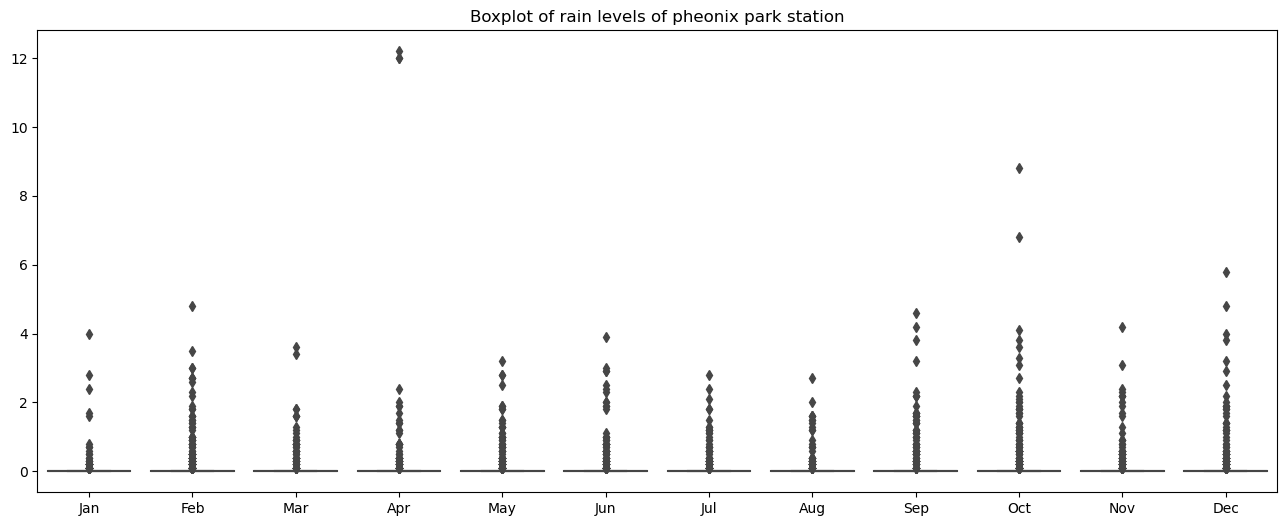

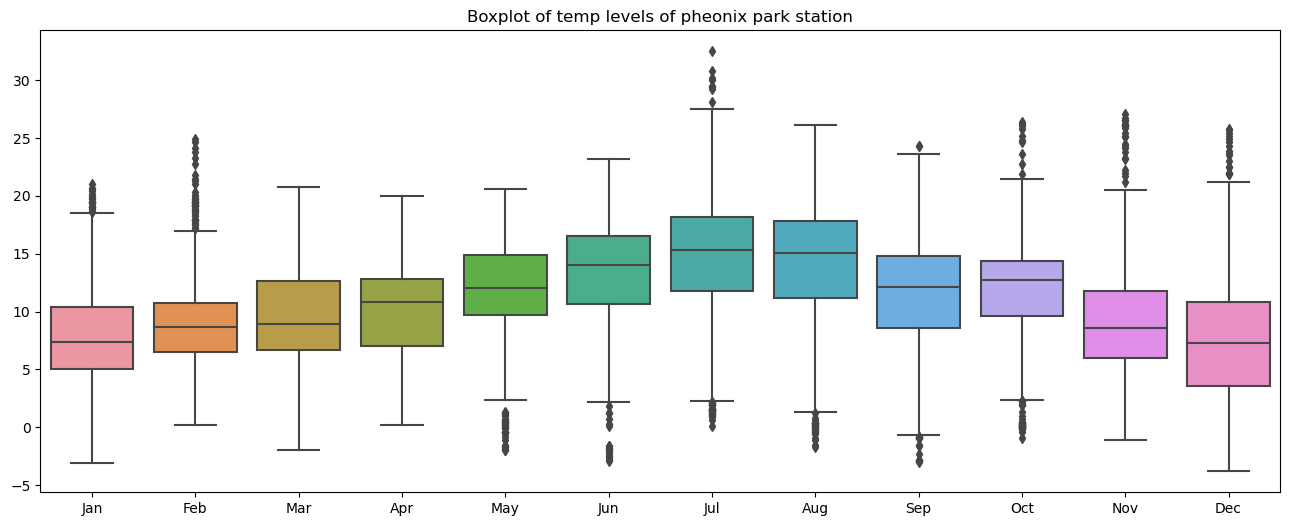

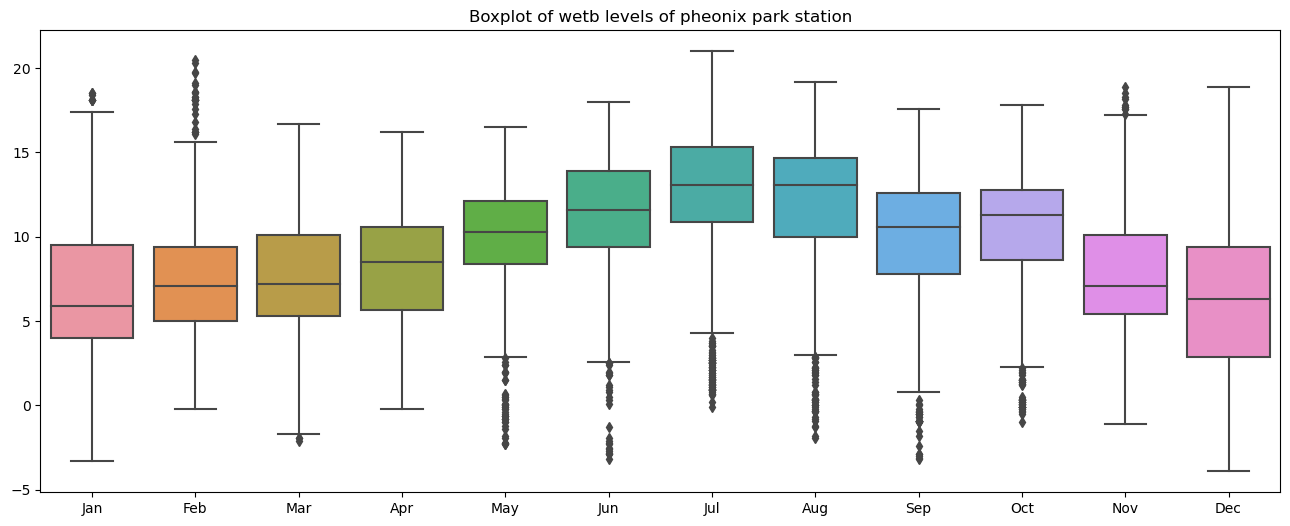

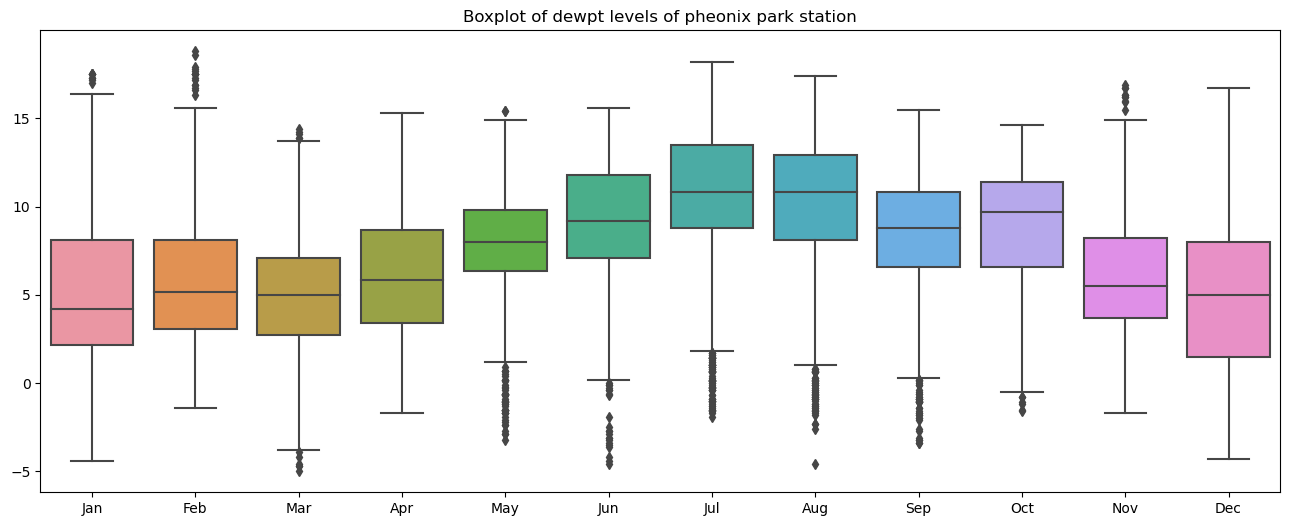

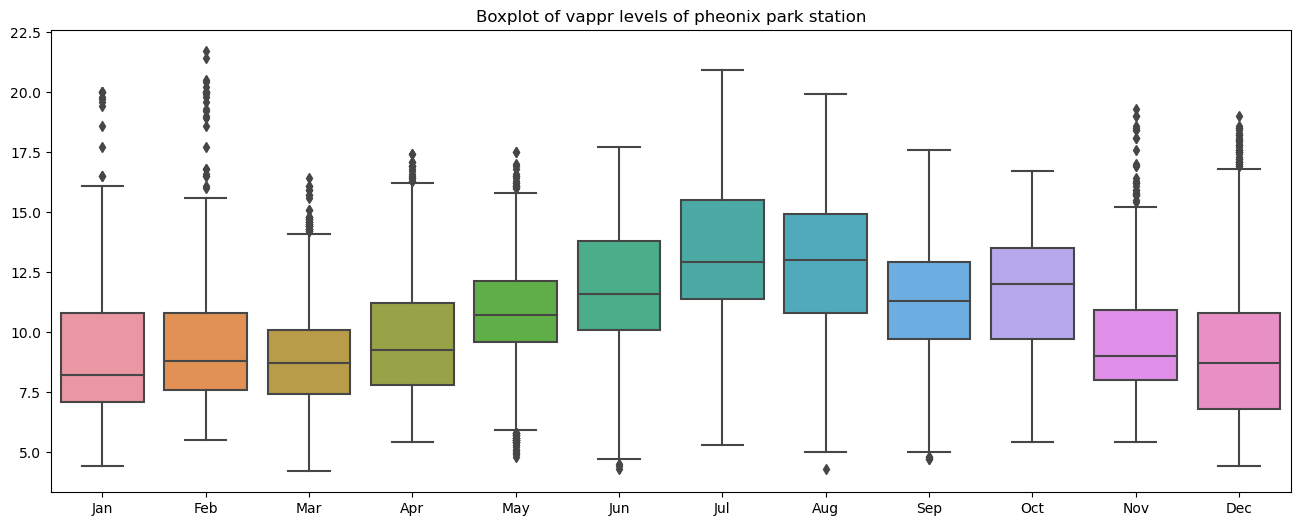

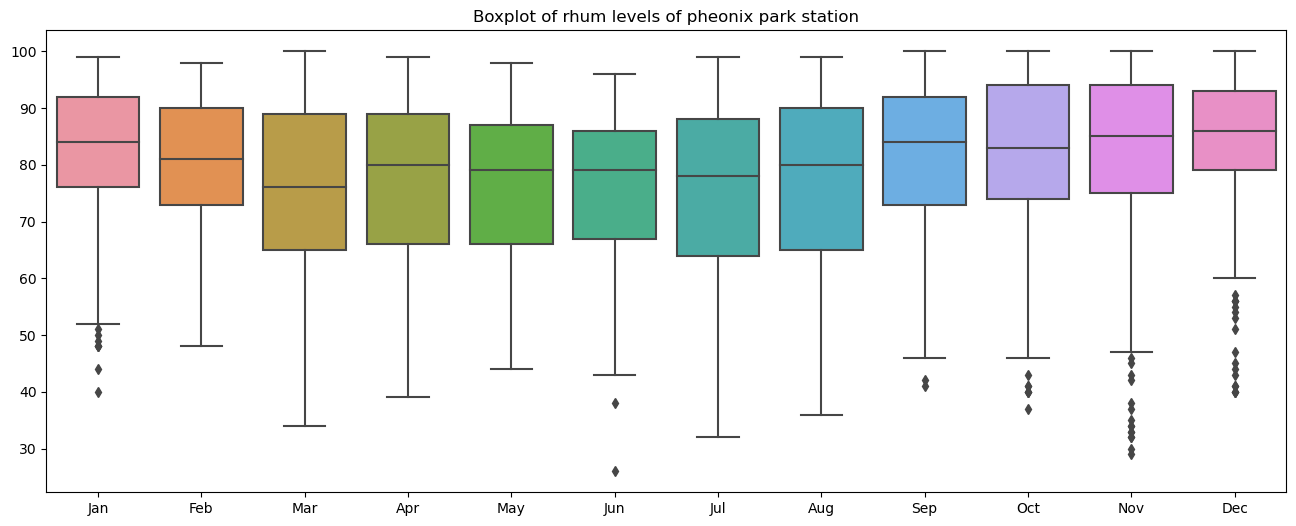

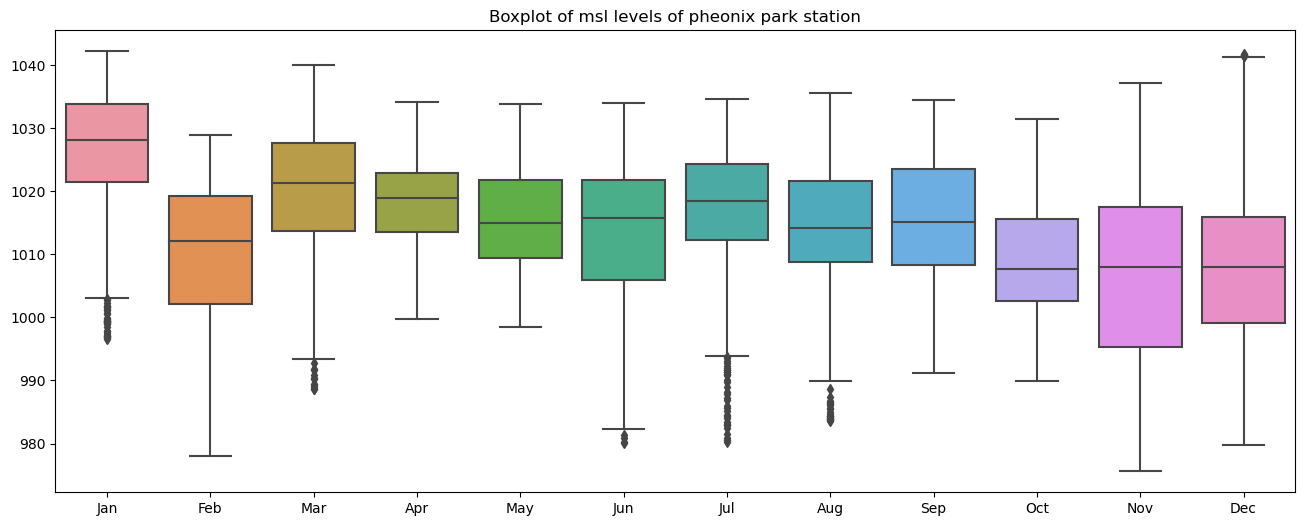

In [11]:
def plotbox(dataset, col, fromtime, to):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%b')
    
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=timeframe, x='month', y=col)
    plt.title("Boxplot of " + col +" levels of pheonix park station")
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

plotbox(met_2022, 'rain','2022-01-01', '2022-12-31')
plotbox(met_2022, 'temp','2022-01-01', '2022-12-31')
plotbox(met_2022, 'wetb','2022-01-01', '2022-12-31')   
plotbox(met_2022, 'dewpt','2022-01-01', '2022-12-31')    
plotbox(met_2022, 'vappr','2022-01-01', '2022-12-31')  
plotbox(met_2022, 'rhum','2022-01-01', '2022-12-31')
plotbox(met_2022, 'msl','2022-01-01', '2022-12-31')

## Visualizing distribution

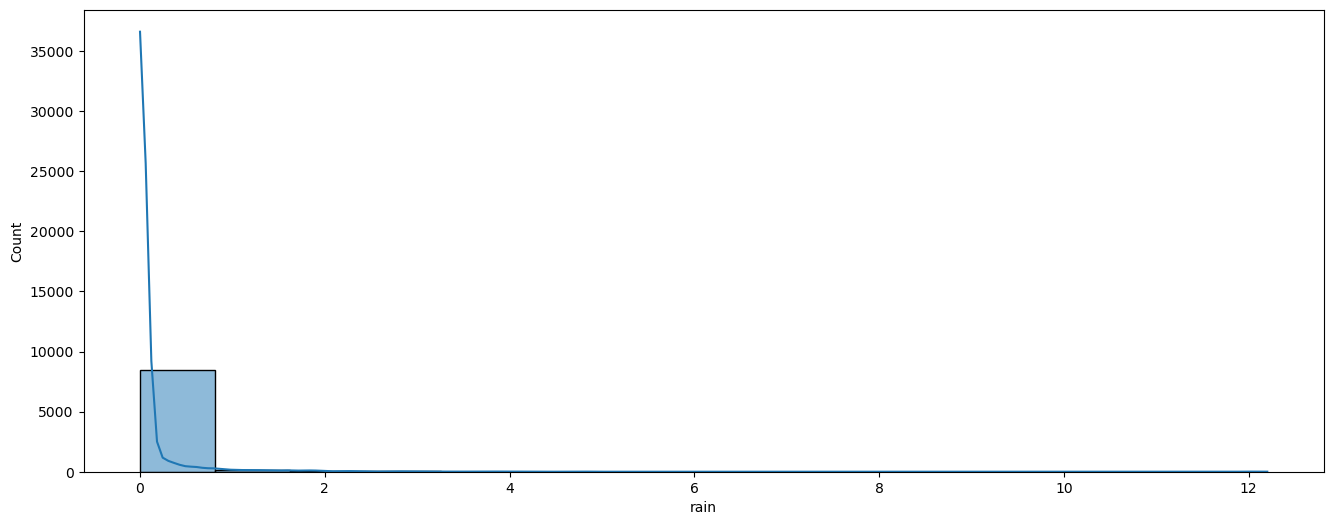

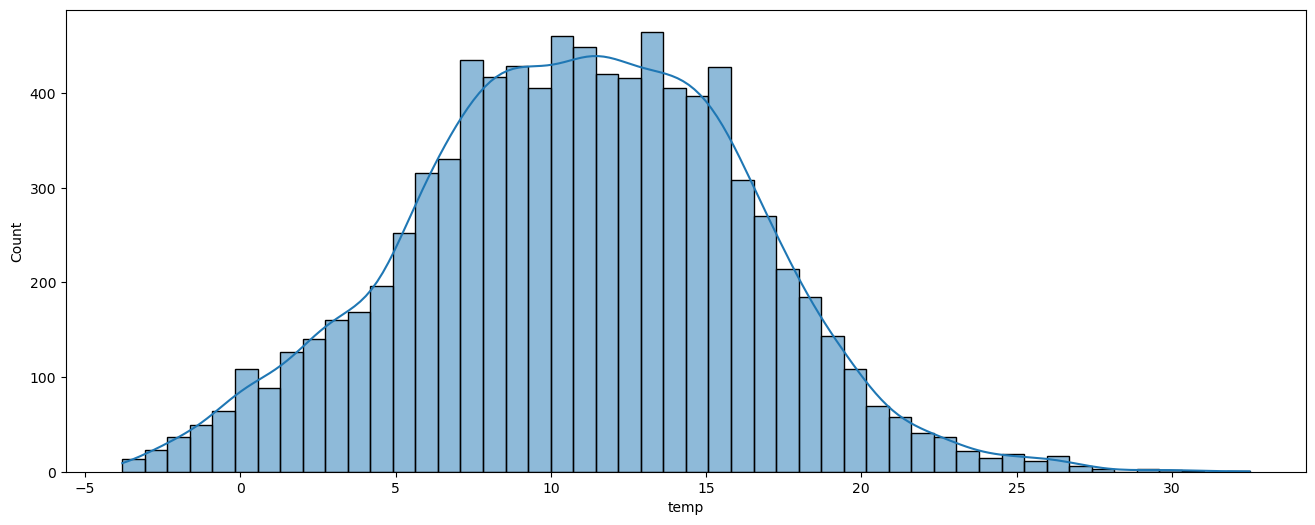

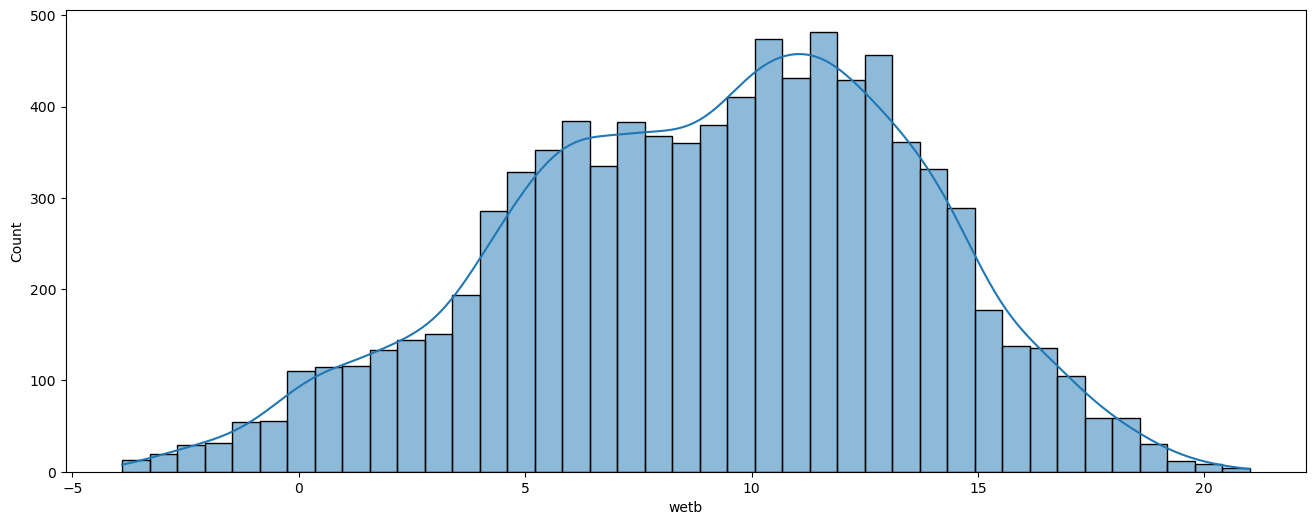

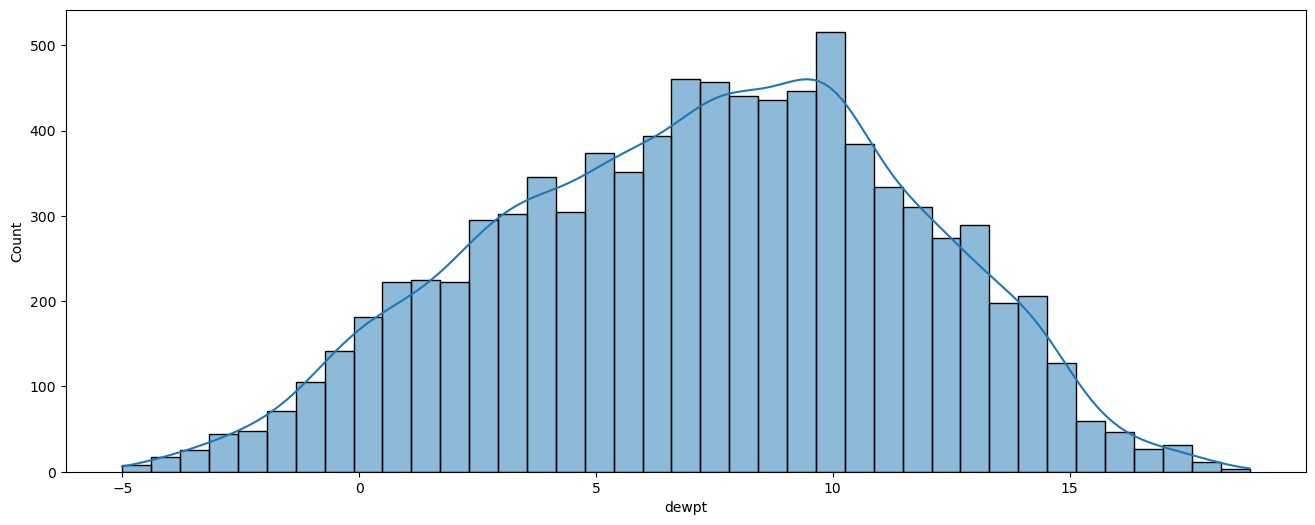

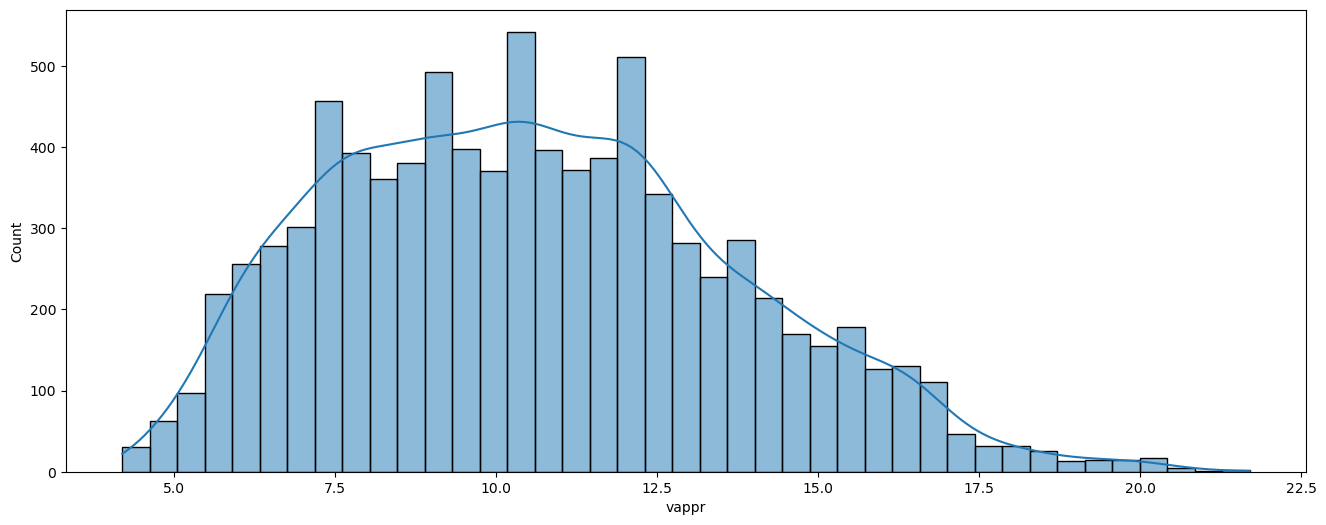

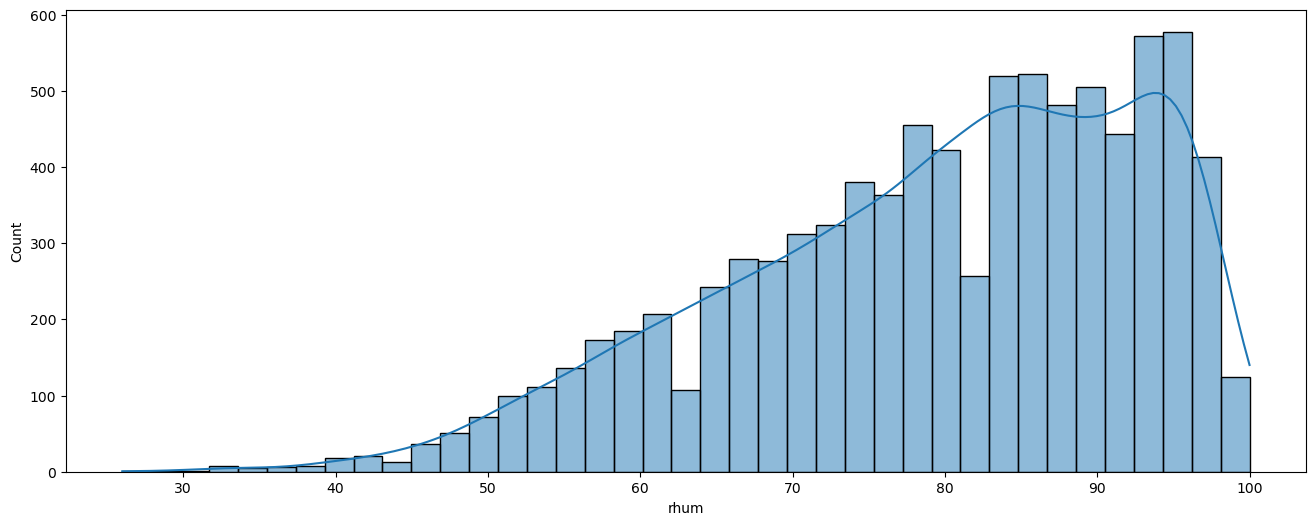

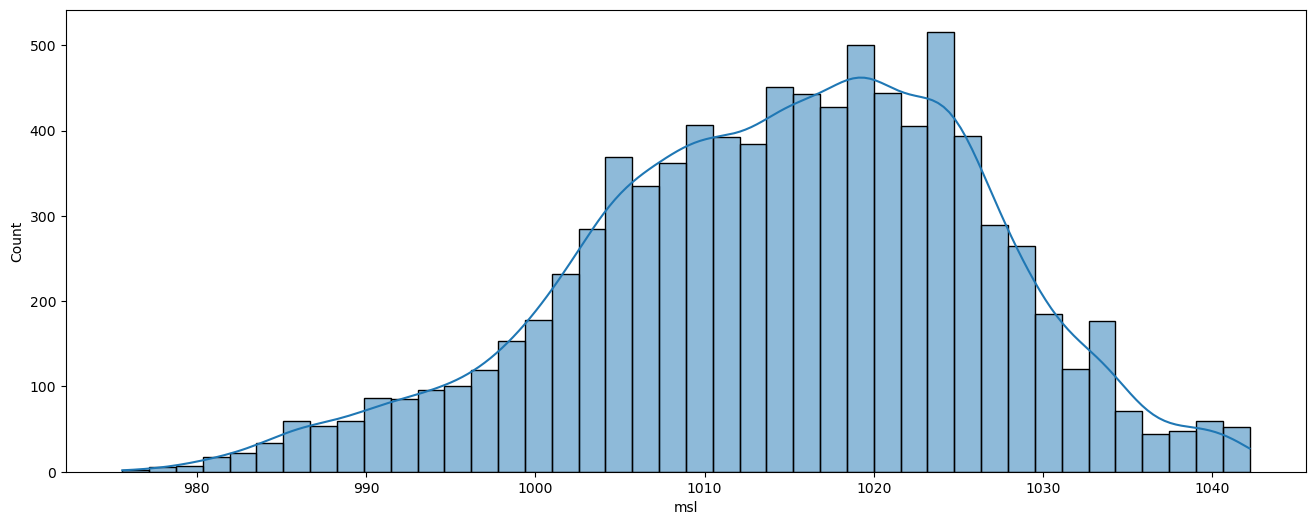

In [12]:
def plothistogram(dataset, col,fromtime, to):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    plt.figure(figsize=(16, 6))
    sns.histplot(timeframe[col], kde=True)
    plt.show()
    

plothistogram(met_2022, 'rain', '2022-01-01', '2022-12-31')
plothistogram(met_2022, 'temp', '2022-01-01', '2022-12-31')
plothistogram(met_2022, 'wetb', '2022-01-01', '2022-12-31')
plothistogram(met_2022, 'dewpt', '2022-01-01', '2022-12-31')
plothistogram(met_2022, 'vappr', '2022-01-01', '2022-12-31')
plothistogram(met_2022, 'rhum', '2022-01-01', '2022-12-31')
plothistogram(met_2022, 'msl', '2022-01-01', '2022-12-31')   

## Visualizing trends

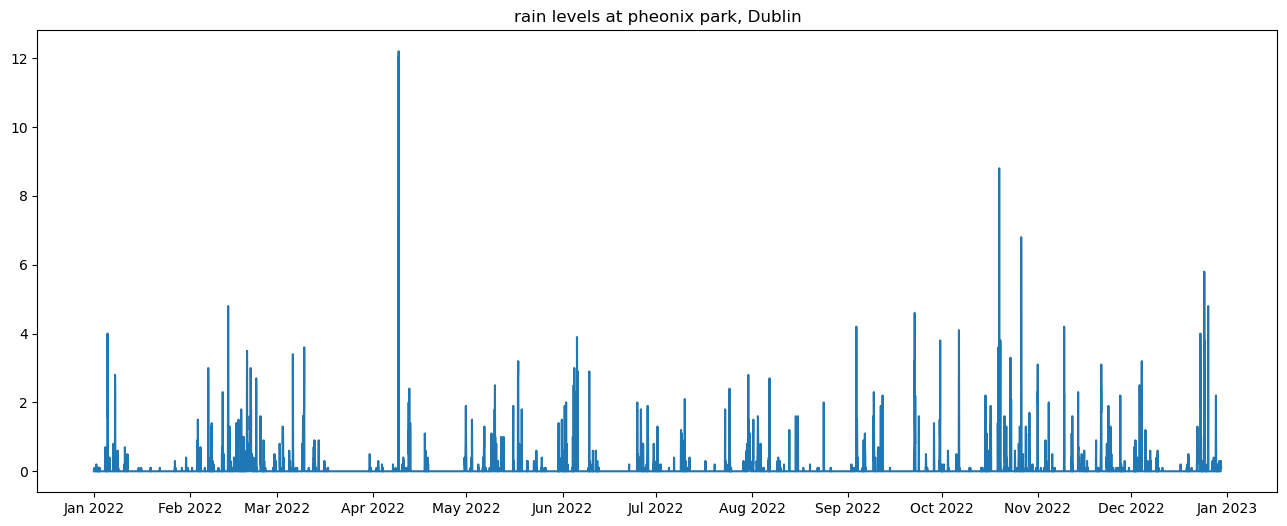

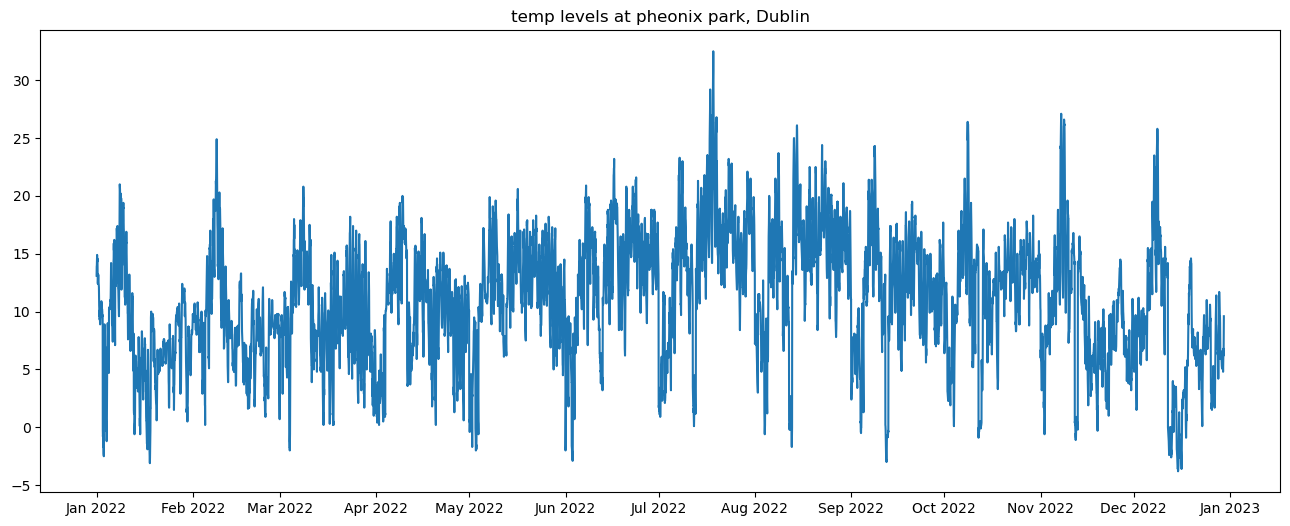

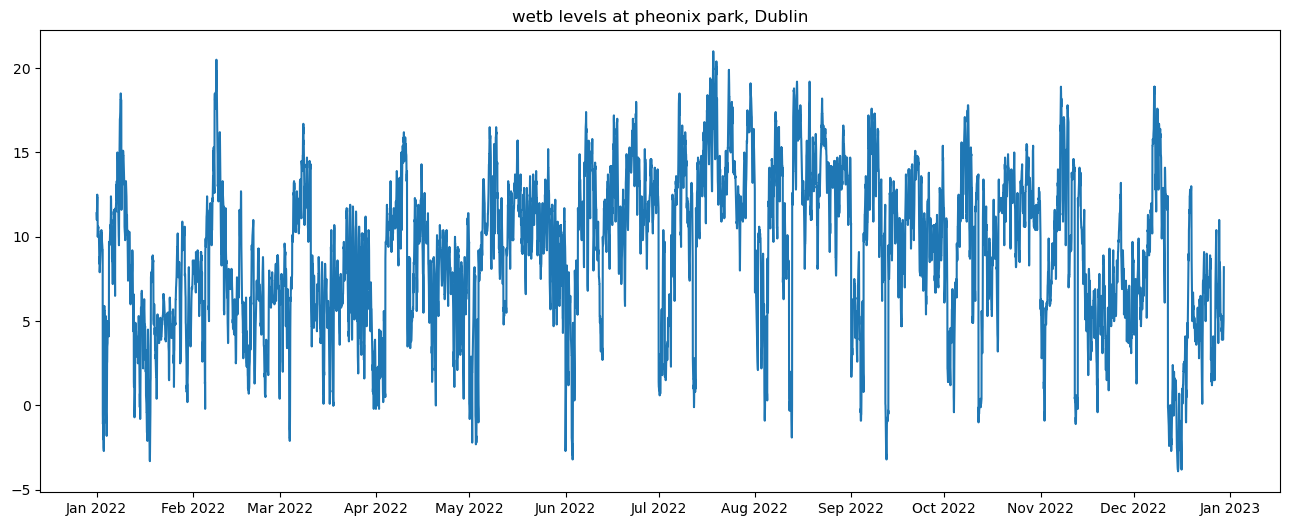

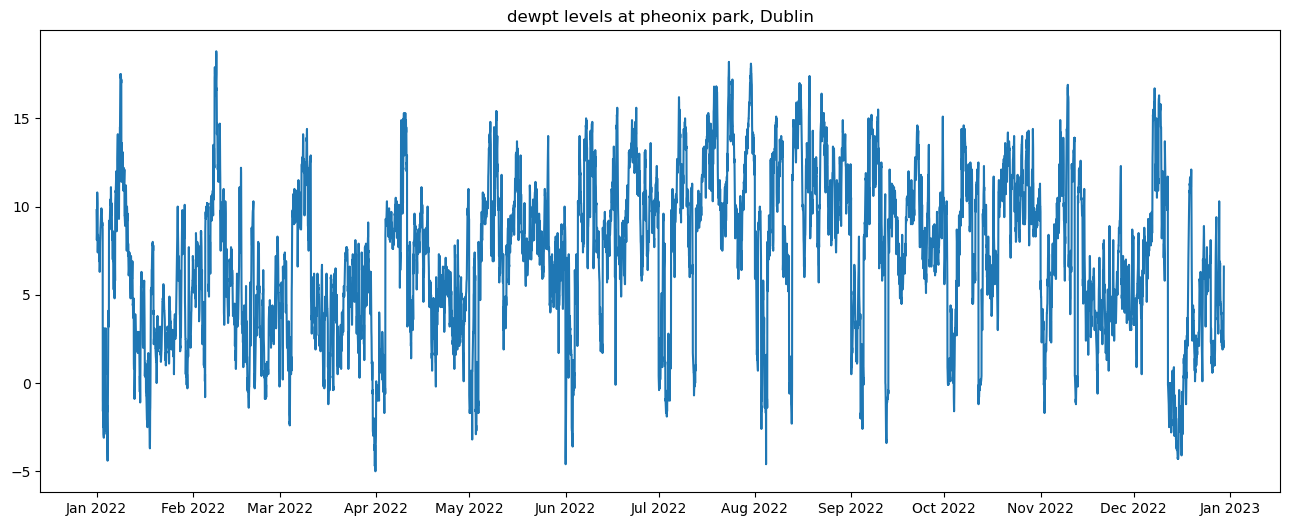

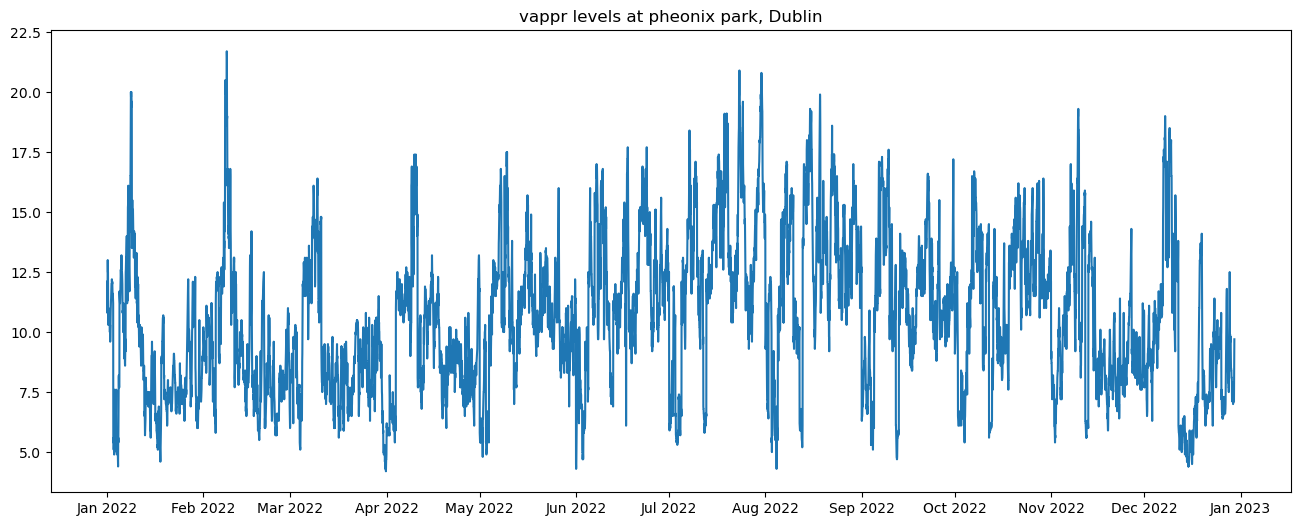

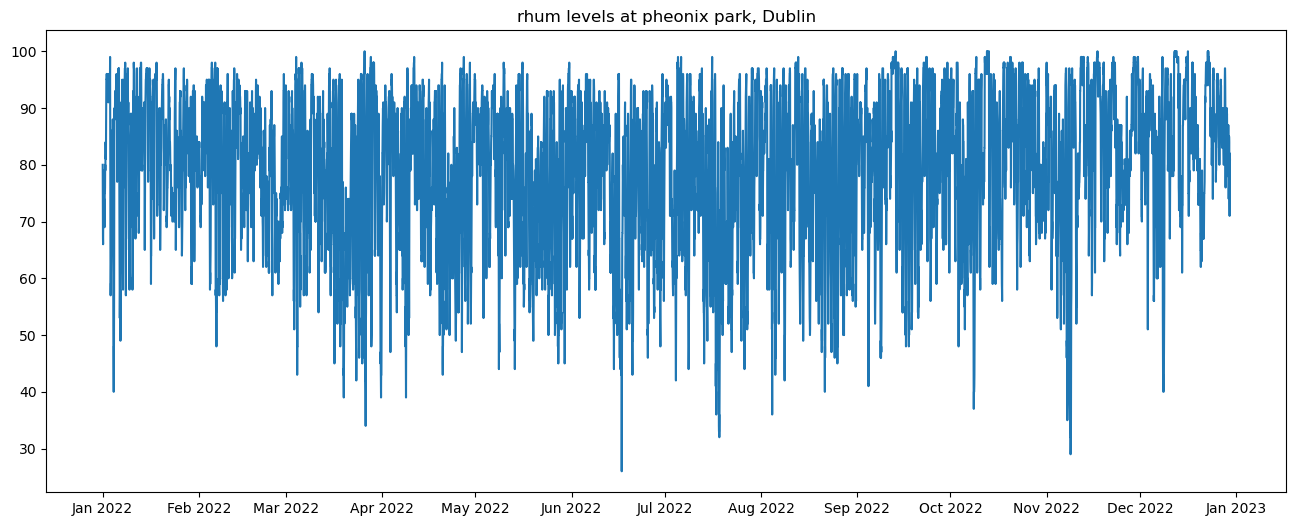

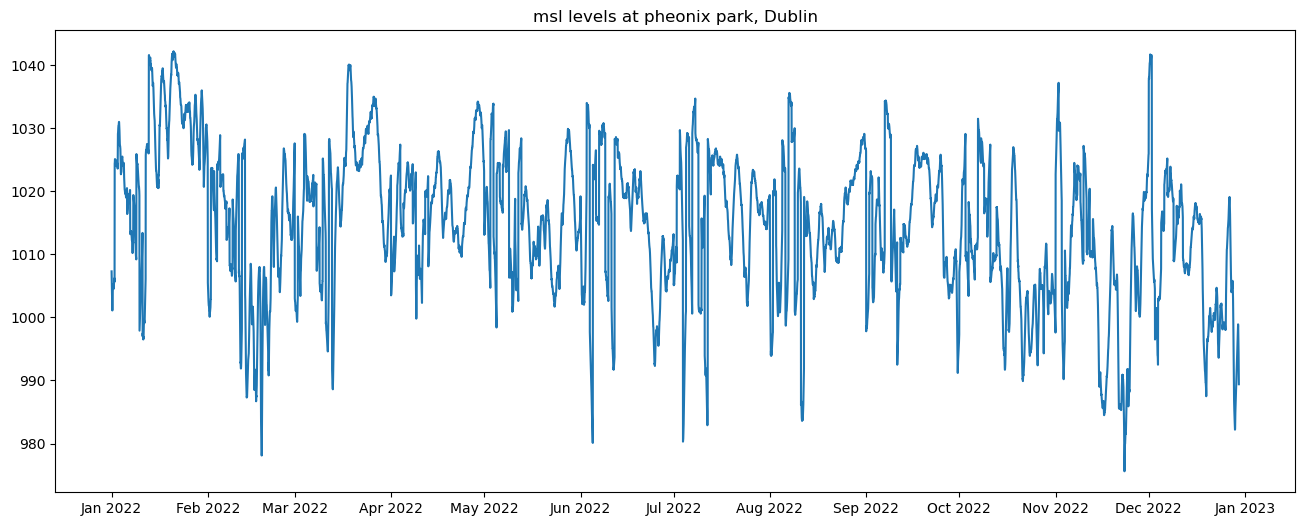

In [13]:
import matplotlib.dates as mdates

def plotline(dataset, col,fromtime, to, title):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]

    plt.figure(figsize=(16, 6))
    sns.lineplot(data=timeframe, x='datetime', y=col)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col +" " +title)

    date_formatter = mdates.DateFormatter('%b %Y')  # Format as abbreviated month and year (e.g., Jan 2022)
    desired_tick_frequency = mdates.MonthLocator()
    # Apply the tick frequency and formatter to the x-axis
    plt.gca().xaxis.set_major_locator(desired_tick_frequency)
    plt.gca().xaxis.set_major_formatter(date_formatter)
    
    #plt.legend()
    
    plt.show()
    

plotline(met_2022, 'rain', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotline(met_2022, 'temp', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotline(met_2022, 'wetb', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotline(met_2022, 'dewpt', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotline(met_2022, 'vappr', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotline(met_2022, 'rhum', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotline(met_2022, 'msl', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')

## Visualizing density

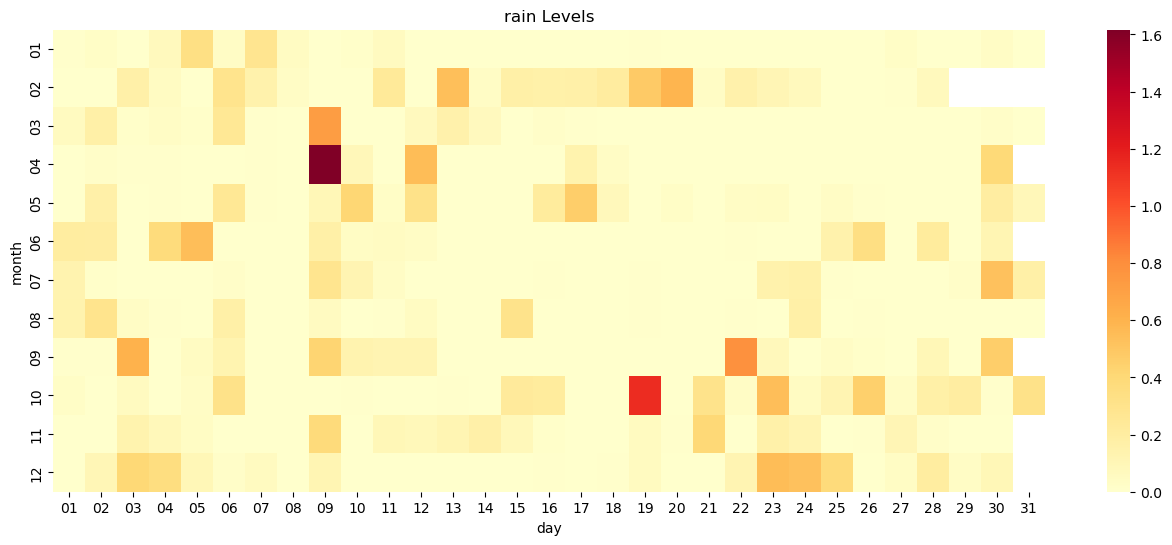

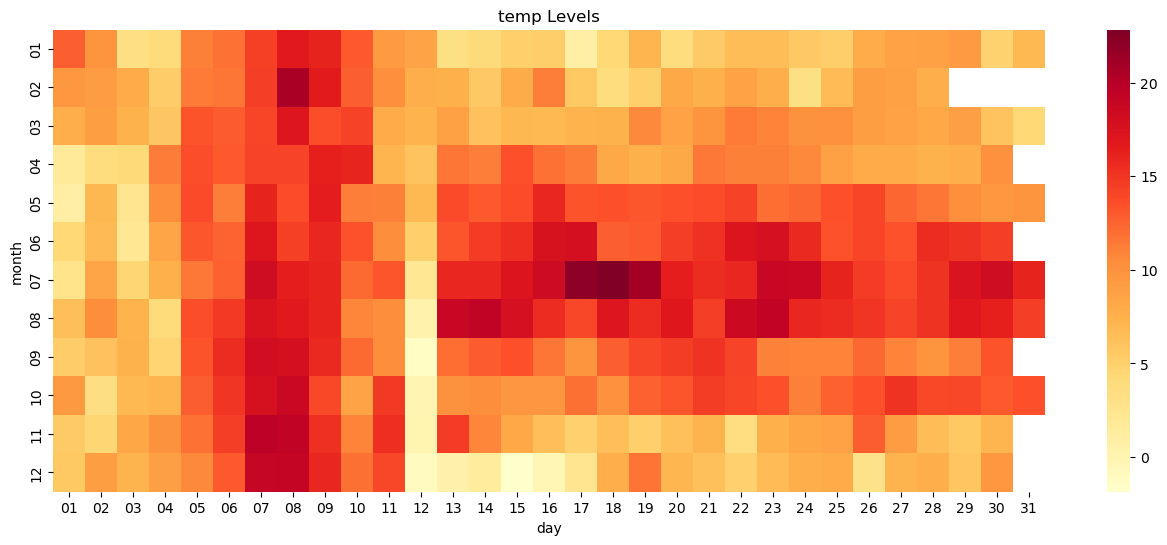

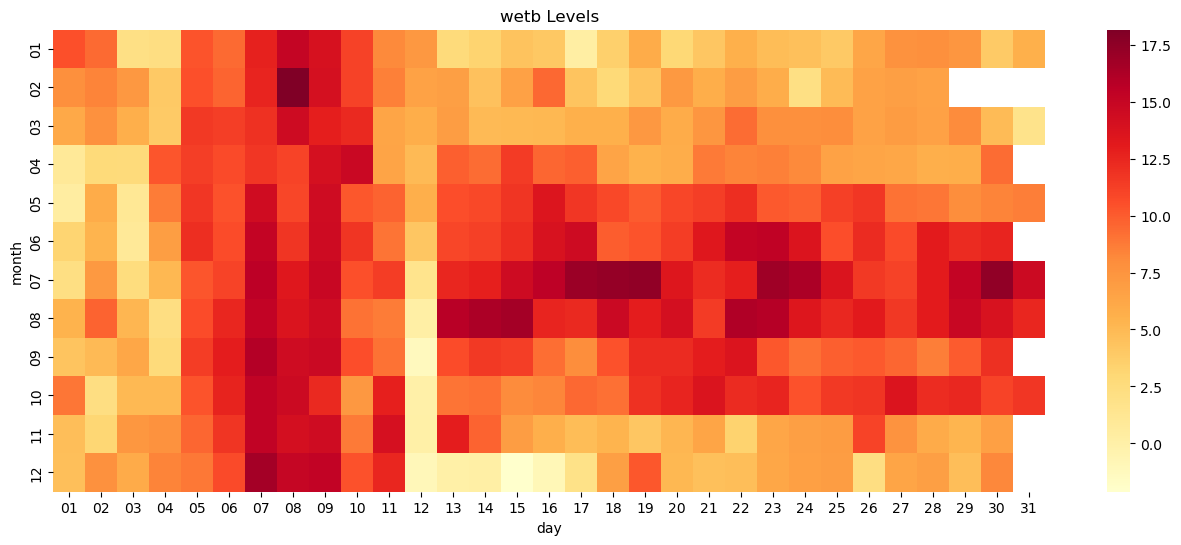

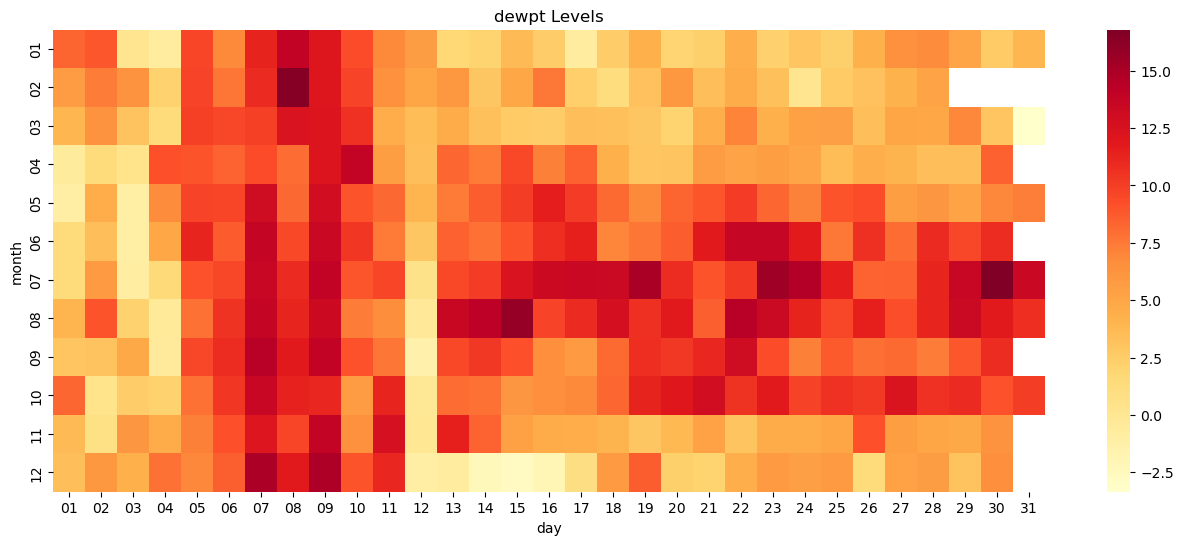

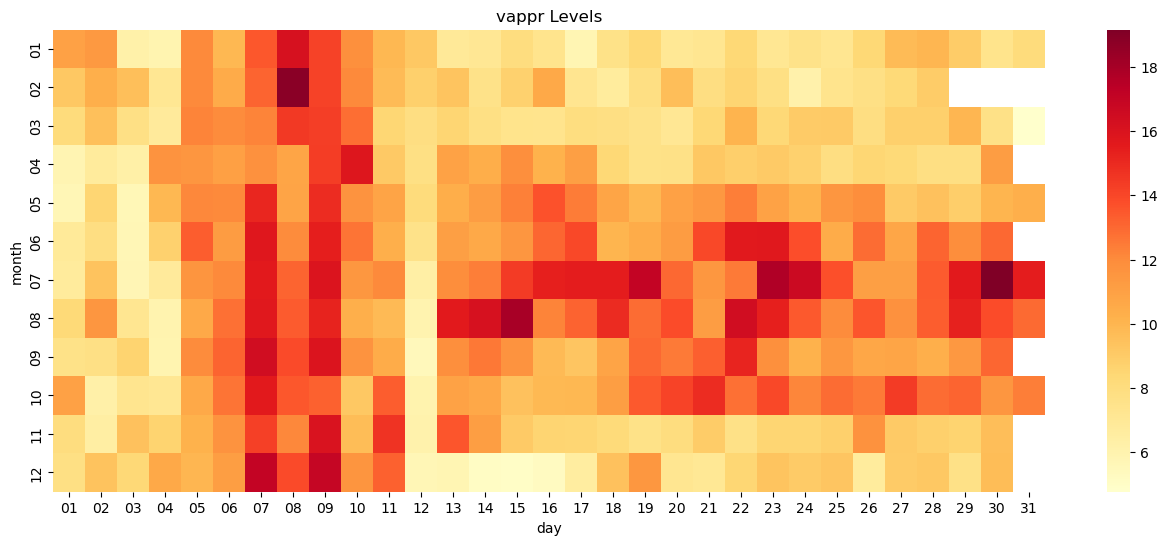

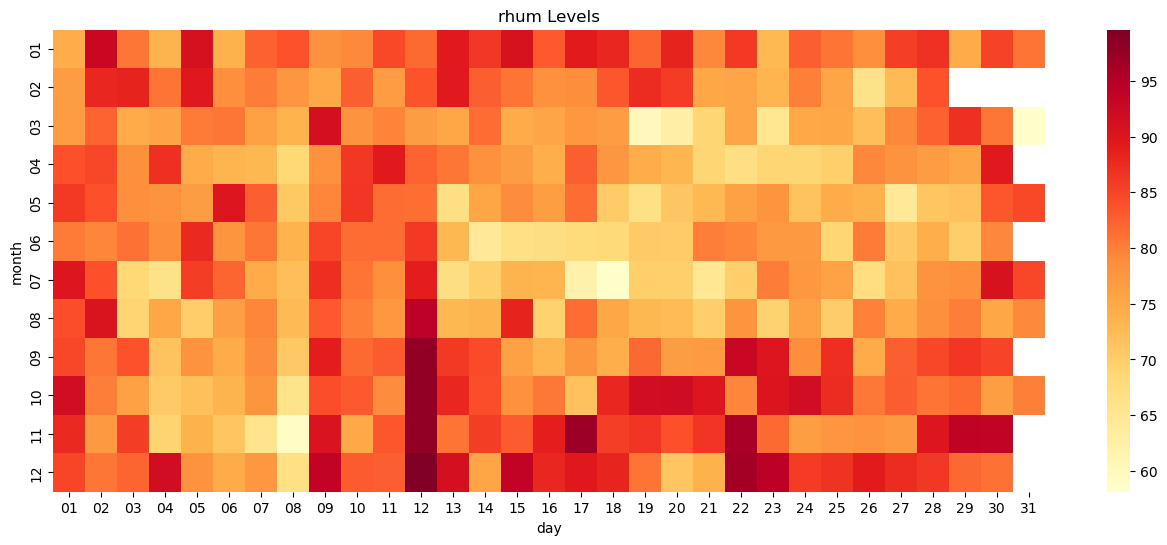

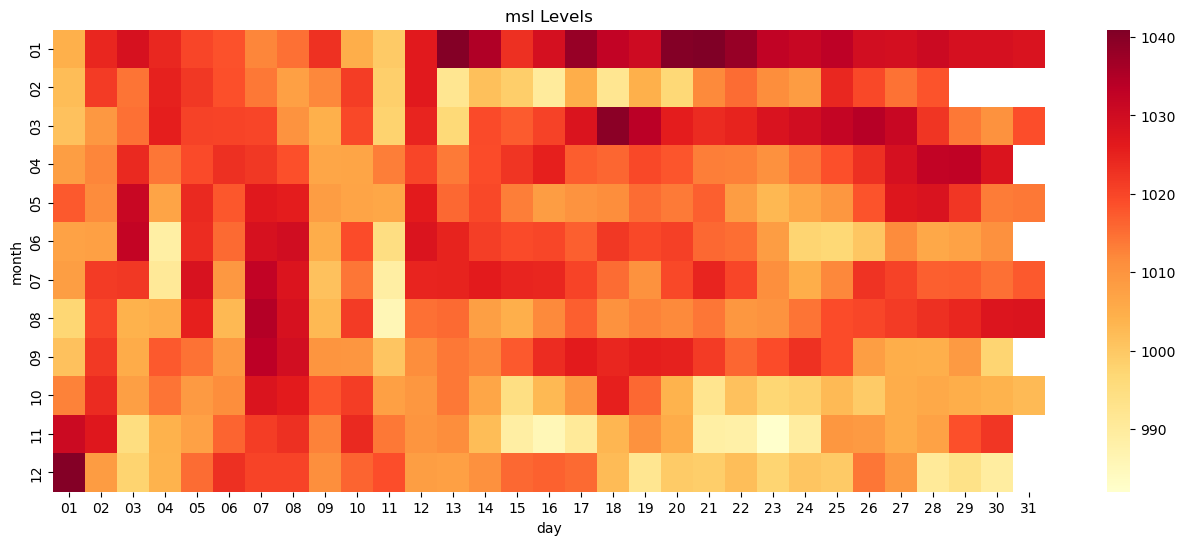

In [14]:
def plotheatmap(dataset, col, fromtime, to, title):
    dataset = dataset.reset_index()
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%m')
    timeframe.loc[:, 'day'] = timeframe['datetime'].dt.strftime('%d')
    
    timeframe_pm10 = timeframe.pivot_table(index = 'month',values=col, columns='day')
    #g = sns.FacetGrid(timeframe, col="month", col_wrap=2)
    
    #g.map_dataframe(lambda data, color: sns.heatmap(data=timeframe, cmap='YlOrRd'))
    plt.figure(figsize=(16, 6))
    sns.heatmap(data=timeframe_pm10, cmap='YlOrRd')
    
    plt.title(col + " Levels")
    plt.show()

plotheatmap(met_2022, 'rain', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotheatmap(met_2022, 'temp', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotheatmap(met_2022, 'wetb', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotheatmap(met_2022, 'dewpt', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotheatmap(met_2022, 'vappr', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotheatmap(met_2022, 'rhum', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')
plotheatmap(met_2022, 'msl', '2022-01-01', '2022-12-30', 'levels at pheonix park, Dublin')

### Visualizing quanitities

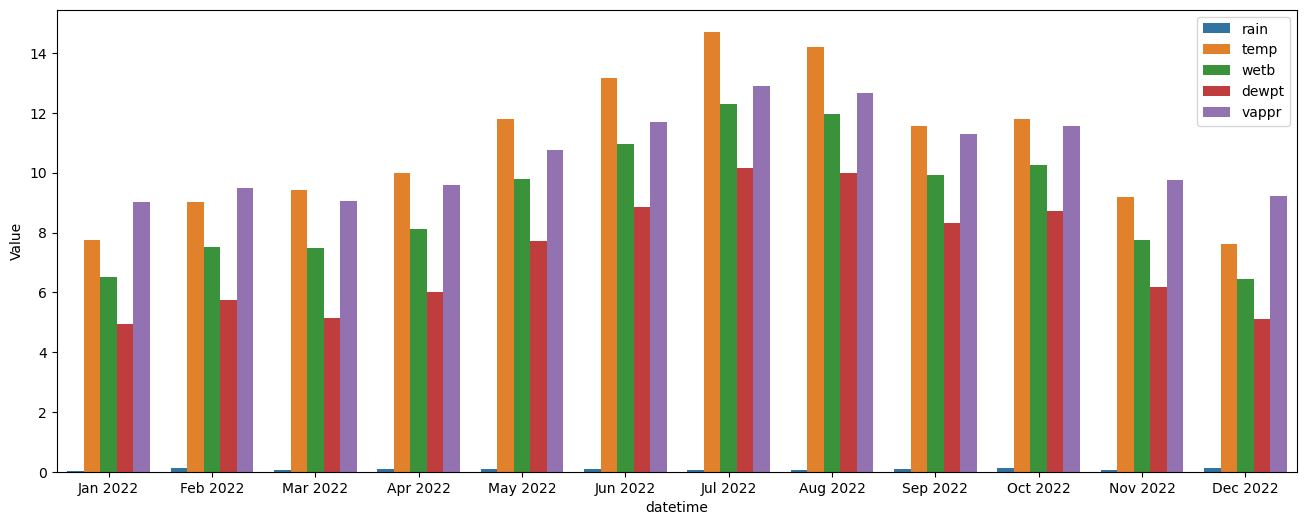

In [15]:
def plotbars(dataset, fromtime, to, title):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    timeframe.set_index('datetime', inplace=True)
    
    timeframe = timeframe.resample('M').mean().reset_index()
    
    plt.figure(figsize=(16, 6))
    
    df_melted = pd.melt(timeframe, id_vars='datetime', value_vars=['rain', 'temp', 'wetb', 'dewpt', 'vappr'], var_name='met', value_name='Value')

    # Create the grouped bar plot using seaborn
    sns.barplot(data=df_melted, x='datetime', y='Value', hue='met')

    plt.gca().xaxis.set_major_formatter(plt.FixedFormatter([date.strftime('%b %Y') for date in timeframe['datetime']]))

    plt.legend()
    
    plt.show()

plotbars(met_2022,'2022-01-01', '2022-12-31', 'AQI levels at pheonix park, Dublin')    


In [16]:
met_2022.to_csv('../data/meterology/met_2022.csv')

In [17]:
met_2022

,datetime,rain,temp,wetb,dewpt,vappr,rhum,msl
161111,2022-01-01 00:00:00,0.0,13.1,11.4,9.8,12.1,80.0,1007.3
161112,2022-01-01 01:00:00,0.0,13.9,11.2,8.5,11.1,70.0,1005.8
161113,2022-01-01 02:00:00,0.0,14.0,11.0,8.1,10.8,67.0,1005.0
161114,2022-01-01 03:00:00,0.0,14.6,11.4,8.4,11.0,66.0,1003.9
161115,2022-01-01 04:00:00,0.0,14.9,12.1,9.5,11.9,70.0,1002.7
...,...,...,...,...,...,...,...,...
169843,2022-12-30 20:00:00,0.0,7.4,6.6,5.5,9.0,87.0,989.8
169844,2022-12-30 21:00:00,0.1,7.2,6.2,4.8,8.6,84.0,990.1
169845,2022-12-30 22:00:00,0.0,7.3,6.1,4.5,8.4,82.0,990.4
169846,2022-12-30 23:00:00,0.0,7.5,6.4,4.9,8.7,83.0,990.6
